In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import datetime
import matplotlib.dates as mdates

## Reflect Tables into SQLALchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

## Bonus Challenge Assignment: Temperature Analysis II

In [11]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps('2017-08-01','2017-08-07'))
year_temps = calc_temps('2017-08-01','2017-08-07')
year_temps

[(72.0, 79.25, 83.0)]


[(72.0, 79.25, 83.0)]

In [18]:
# Create DataFrame to plot with
year_temps = pd.DataFrame(year_temps, columns=['Temp_Min', 'Temp_Avg', 'Temp_Max'])
year_temps


,Temp_Min,Temp_Avg,Temp_Max
0,72.0,79.25,83.0


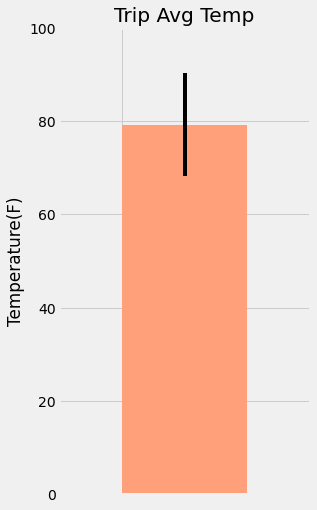

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
error_bar = year_temps['Temp_Max'] - year_temps['Temp_Min']
y=['Temp_Avg']
year_temps.plot(kind='bar', y=y, yerr=error_bar, 
                figsize=(4,8), color='lightsalmon', 
                align='edge', legend=False)
plt.ylim(0,100)
plt.ylabel('Temperature(F)')
plt.title('Trip Avg Temp')
plt.tick_params(axis='x', which='both', labelbottom=False)

# Save the Bar chart as .png
plt.savefig('../Images/temperature_bar.png')
plt.show()

### Daily Rainfall Average

In [20]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Station.station, Station.name,Station.latitude,Station.longitude, Station.elevation,func.sum(Measurement.tobs)]
stations_rainfall = session.query(*sel).group_by(Measurement.station).\
                    outerjoin(Station, Measurement.station==Station.station).\
                    filter(Measurement.date >= '2017-08-01').\
                    filter(Measurement.date <= '2017-08-07').\
                    order_by(func.sum(Measurement.tobs).desc()).all()
stations_rainfall

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 550.0),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 486.0),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 479.0),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 462.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 242.0)]

### Daily Temperature Normals

In [16]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
start_date = dt.strptime(start_date,'%Y-%m-%d')
end_date = dt.strptime(end_date,'%Y-%m-%d')
range_days = []
print((end_date-start_date).days)
for i in range((end_date-start_date).days+1):
    range_days.append(start_date+datetime.timedelta(days=i))   


dates_strip = [dt.strftime(date,"%m-%d") for date in range_days]
print(dates_strip)

#Use the `daily_normals` function to calculate the normals for each date string
#and append the results to a list called `normals`.
normals = []
for date in dates_strip:
                   normal = daily_normals(date)
                   print(normal)
                   normals.append(normal[0])
    
print(normals) 

6
['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07']
[(67.0, 75.54, 83.0)]
[(68.0, 75.60377358490567, 84.0)]
[(70.0, 76.61111111111111, 85.0)]
[(69.0, 76.71153846153847, 84.0)]
[(69.0, 76.14814814814815, 82.0)]
[(67.0, 76.25, 83.0)]
[(71.0, 77.15686274509804, 83.0)]
[(67.0, 75.54, 83.0), (68.0, 75.60377358490567, 84.0), (70.0, 76.61111111111111, 85.0), (69.0, 76.71153846153847, 84.0), (69.0, 76.14814814814815, 82.0), (67.0, 76.25, 83.0), (71.0, 77.15686274509804, 83.0)]


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_df = pd.DataFrame(normals, columns=['Temp_Min','Temp_Avg', 'Temp_Max'], index=range_days)
trip_df.index.name='Date'
# trip_df.Date=trip_df.Date.apply(lambda t:str(t))
trip_df

,Temp_Min,Temp_Avg,Temp_Max
Date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


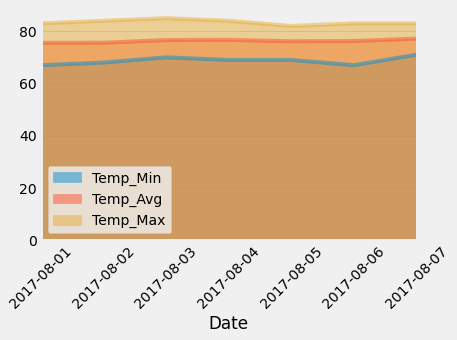

In [27]:
# Plot the daily normals as an area plot with `stacked=False`# Plot the daily normals as an area plot with `stacked=False`
ax=trip_df.plot.area(stacked=False)
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.tick_params(axis="x", which="both", rotation=45)
# plt.savefig('Images/temperature_bar.png')


# Save the Bar chart as .png
plt.savefig('../Images/daily_normals.png')
plt.show()

## Close Session

In [25]:
# Close Session
session.close()